# Влияние различных факторов на выживаемость пассажиров при крушении Титаника
### Отчет подготовила Шеренешева Анастасия

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Для начала рассмотрим самую общую информацию:

In [2]:
tit = pd.read_csv('train.csv')
print('Количество пассажиров:', tit.PassengerId.nunique())
print('Процент женщин: {}%' .format(int(100 * pd.get_dummies(tit.Sex)['female'].sum() / tit.PassengerId.nunique())))
print('Процент мужчин: {}%' .format(int(100 * pd.get_dummies(tit.Sex)['male'].sum() / tit.PassengerId.nunique())))

Количество пассажиров: 891
Процент женщин: 35%
Процент мужчин: 64%


## Гипотеза №1:
#### Пол повлиял на выживаемость

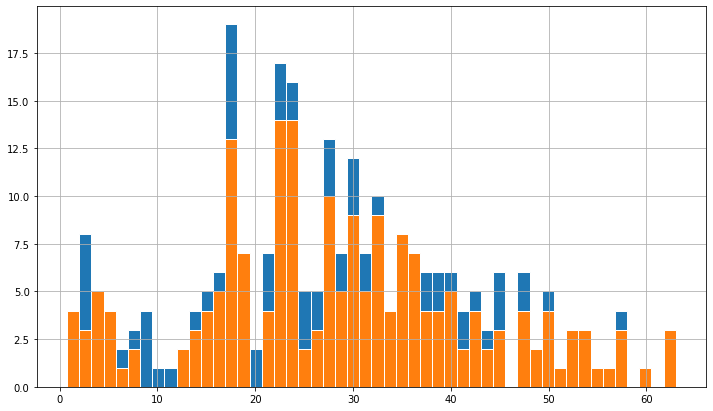

In [3]:
tit[tit['Sex'] == 'female']['Age'].hist(figsize=(14,9), bins=50, edgecolor='white')
tit[(tit['Sex'] == 'female') & (tit['Survived'] == 1)]['Age'].hist(figsize=(12,7), bins=50, edgecolor='white')

Гистограмма распределения возраста женщин на Титанике, оранжевым-выжившие, синим-все

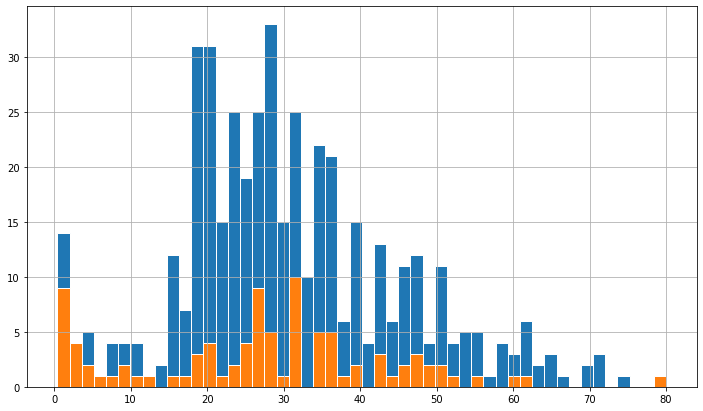

In [102]:
tit[tit['Sex'] == 'male']['Age'].hist(figsize=(14,9), bins=50, edgecolor='white')
tit[(tit['Sex'] == 'male') & (tit['Survived'] == 1)]['Age'].hist(figsize=(12, 7), bins=50, edgecolor='white')

Гистограмма распределения возраста мужчин на Титанике, оранжевым-выжившие, синим-все

#### Из гистограмм ясно видно, что женщин в процентном соотношении спаслось больше чем, мужчин. Гипотеза подтверждена.

## Гипотеза №2:
#### Чем выше класс обслуживания, тем больше в нем пассажиров спаслось

In [4]:
print('В первом классе всего человек:', tit[tit.Pclass == 1]['PassengerId'].nunique())
print('Cпаслось: {}%' .format(int(100 * tit[(tit.Survived == 1) & (tit.Pclass == 1)]['PassengerId'].nunique() 
                                                 / tit[tit.Pclass == 1]['PassengerId'].nunique())))
print('Во втором классе всего человек:', tit[tit.Pclass == 2]['PassengerId'].nunique())
print('Спаслось: {}%' .format(int(100 * tit[(tit.Survived == 1) & (tit.Pclass == 2)]['PassengerId'].nunique() 
                                                 / tit[tit.Pclass == 2]['PassengerId'].nunique())))
print('В третьем классе всего человек:', tit[tit.Pclass == 3]['PassengerId'].nunique())
print('Спаслось: {}%' .format(int(100 * tit[(tit.Survived == 1) & (tit.Pclass == 3)]['PassengerId'].nunique() 
                                                 / tit[tit.Pclass == 3]['PassengerId'].nunique())))

В первом классе всего человек: 216
Cпаслось: 62%
Во втором классе всего человек: 184
Спаслось: 47%
В третьем классе всего человек: 491
Спаслось: 24%


#### С убыванием класса обслуживания убывает и процент выживших пассажиров. Гипотеза подтверждена. 

Однако, стоит заметить, что и в первой, и во второй гипотезе рассматриваются множества неравных мощностей. То есть, количество человек в разных группах может отличаться в более, чем 2 раза, поэтому сравнивать процентные соотношения в таких группах кажется нецелесообразным.

## Гипотеза №3:
#### Чем выше стоимость билета, тем выше был шанс спастись

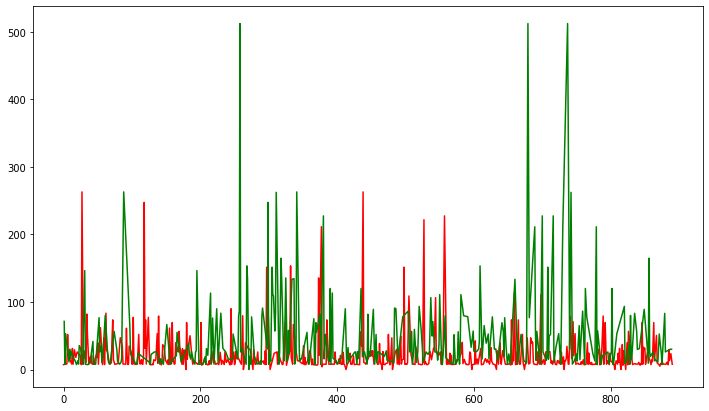

In [45]:
tit[tit['Survived'] == 0]['Fare'].plot(figsize=(12, 7), color='red')
tit[tit['Survived'] == 1]['Fare'].plot(figsize=(12, 7), color='green')

In [67]:
print('Вероятность выжить с билетом дороже 100$: {}%'.format(int(100*tit[(tit['Survived'] == 1) & (tit['Fare']>100)].count()[0] 
                                                                / tit[tit['Fare']>100].count()[0])))

Вероятность выжить с билетом дороже 100$: 73%


#### Из графика видно, что вероятность выжить с дорогим билетом была выше, чем с обычным. Гипотеза подтверждена.

## Вывод:
### Чтобы выжить на Титанике с наибольшей вероятностью, нужно было быть женщиной из первого класса с самым дорогим билетом.